<a href="https://www.kaggle.com/code/eavprog/abscur-reit-stabil?scriptVersionId=133718087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг стабильности валют по абсолютным курсам

Ранжируем валюты по убыванию нормированного стандартного отклонения их абсолютных курсов (делим стандартное отклонение на среднее значение). Расчет производим за разные временные промежутки от месяца до 5 лет.

---

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

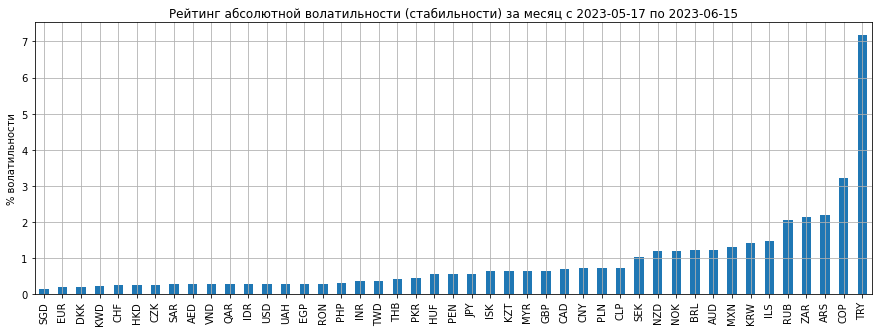

**Самые стабильные и волатильные валюты за месяц:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**SGD**|0.151%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**EUR**|0.207%|Евро|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B2%D1%80%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EUR)|
|**DKK**|0.209%|Датская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B0%D1%82%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#DKK)|
|**KWD**|0.214%|Кувейтский динар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KWD)|
|**CHF**|0.247%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|...|...|...|...|
|**RUB**|2.051%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**ZAR**|2.133%|Южноафриканский рэнд|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ZAR)|
|**ARS**|2.193%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**COP**|3.204%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**TRY**|7.173%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


# За квартал

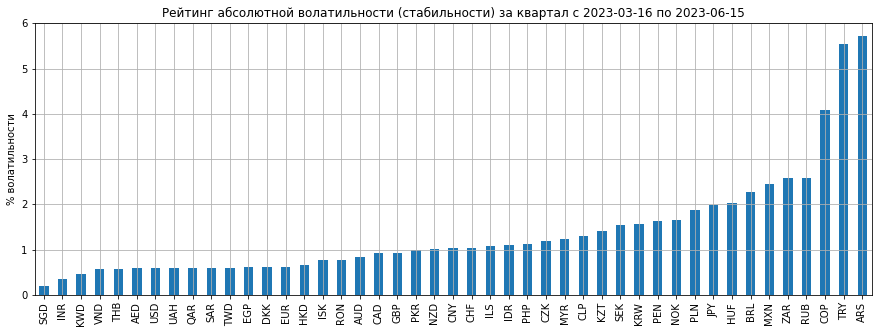

**Самые стабильные и волатильные валюты за квартал:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**SGD**|0.209%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**INR**|0.355%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**KWD**|0.471%|Кувейтский динар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KWD)|
|**VND**|0.565%|Вьетнамский донг|[wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%BD%D0%B3), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#VND)|
|**THB**|0.586%|Тайский бат|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B1%D0%B0%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#THB)|
|...|...|...|...|
|**ZAR**|2.586%|Южноафриканский рэнд|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ZAR)|
|**RUB**|2.588%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**COP**|4.082%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**TRY**|5.544%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|5.714%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


# За полгода

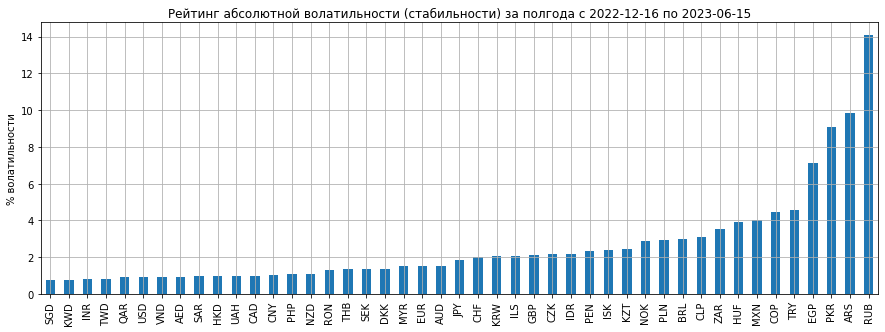

**Самые стабильные и волатильные валюты за полгода:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**SGD**|0.747%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**KWD**|0.751%|Кувейтский динар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KWD)|
|**INR**|0.825%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**TWD**|0.825%|Новый тайваньский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TWD)|
|**QAR**|0.928%|Катарский риал|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%B0%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#QAR)|
|...|...|...|...|
|**TRY**|4.579%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**EGP**|7.126%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**PKR**|9.075%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**ARS**|9.866%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**RUB**|14.074%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|


# За год

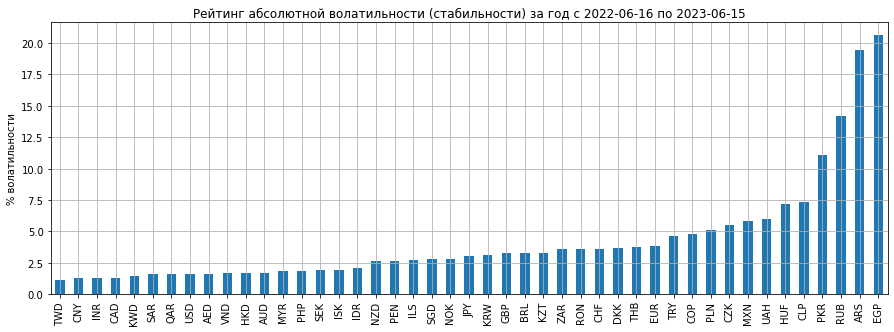

**Самые стабильные и волатильные валюты за год:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**TWD**|1.083%|Новый тайваньский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TWD)|
|**CNY**|1.241%|Китайский юань|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%82%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8E%D0%B0%D0%BD%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CNY)|
|**INR**|1.254%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**CAD**|1.314%|Канадский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%BD%D0%B0%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CAD)|
|**KWD**|1.404%|Кувейтский динар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KWD)|
|...|...|...|...|
|**CLP**|7.371%|Чилийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CLP)|
|**PKR**|11.11%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**RUB**|14.155%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**ARS**|19.437%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**EGP**|20.631%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|


# За 2 года

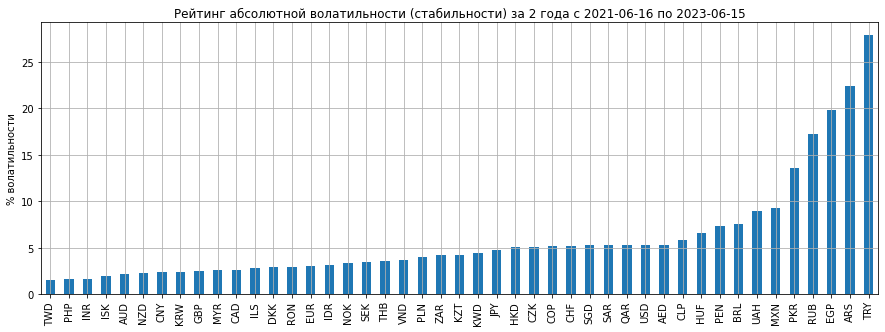

**Самые стабильные и волатильные валюты за 2 года:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**TWD**|1.53%|Новый тайваньский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TWD)|
|**PHP**|1.589%|Филиппинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PHP)|
|**INR**|1.591%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**ISK**|1.989%|Исландская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D1%81%D0%BB%D0%B0%D0%BD%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ISK)|
|**AUD**|2.192%|Австралийский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B0%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#AUD)|
|...|...|...|...|
|**PKR**|13.561%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**RUB**|17.251%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**EGP**|19.786%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**ARS**|22.349%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**TRY**|27.856%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


# За 3 года

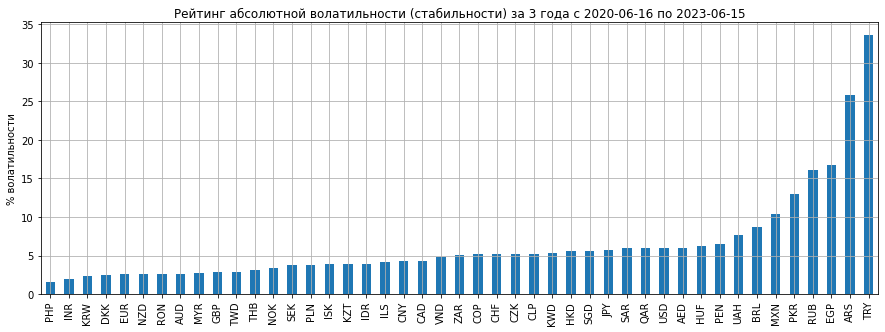

**Самые стабильные и волатильные валюты за 3 года:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**PHP**|1.541%|Филиппинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PHP)|
|**INR**|1.905%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**KRW**|2.394%|Южнокорейская вона|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%BA%D0%BE%D1%80%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KRW)|
|**DKK**|2.485%|Датская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B0%D1%82%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#DKK)|
|**EUR**|2.55%|Евро|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B2%D1%80%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EUR)|
|...|...|...|...|
|**PKR**|13.05%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**RUB**|16.15%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**EGP**|16.781%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**ARS**|25.898%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**TRY**|33.596%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


# За 5 лет

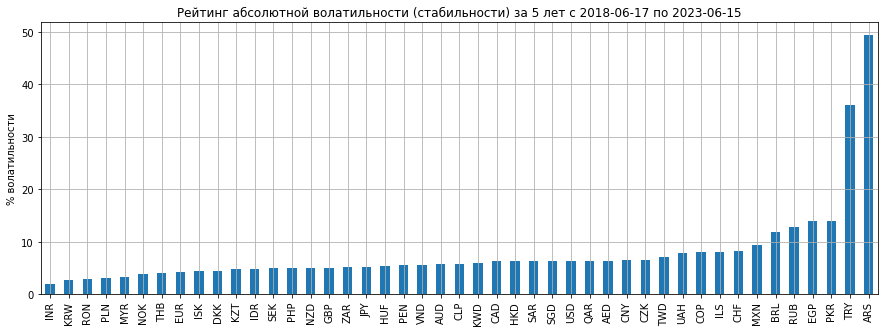

**Самые стабильные и волатильные валюты за 5 лет:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**INR**|1.898%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**KRW**|2.617%|Южнокорейская вона|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%BA%D0%BE%D1%80%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KRW)|
|**RON**|2.943%|Румынский лей|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D1%83%D0%BC%D1%8B%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BB%D0%B5%D0%B9), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RON)|
|**PLN**|3.121%|Польский злотый|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B7%D0%BB%D0%BE%D1%82%D1%8B%D0%B9), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PLN)|
|**MYR**|3.328%|Малайзийский ринггит|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%B0%D0%B9%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%BD%D0%B3%D0%B3%D0%B8%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MYR)|
|...|...|...|...|
|**RUB**|12.707%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**EGP**|13.858%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**PKR**|14.023%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**TRY**|36.018%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|49.367%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


In [1]:
import numpy as np
import pandas as pd
import abscur_menu
from IPython.display import Markdown, display
import datetime
import matplotlib.pyplot as plt
import abscur_post as ap

abscur_menu.print_menu()

abscur = pd.read_csv("/kaggle/input/abscur-data/abscur.csv",index_col=0,parse_dates=['Date'])
ras_cur = pd.read_csv("/kaggle/input/abscur-data/cur_ras.csv",index_col=0)
cur_ras = ras_cur

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = abscur.asfreq(freq="D").index[-per]
    date_finish = abscur.index[-1]
    
    res = abscur[abscur.index >= date_start]
    res = res.std()/res.mean()*100
    res.sort_values(ascending=True,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг абсолютной волатильности (стабильности) за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="% волатильности",legend=False,figsize=(15,5))
    plt.savefig(str(cnt) + ".png")
    plt.show()
    
    text = "**Самые стабильные и волатильные валюты за " + title_per + ":**\n\n"
    text += "|код|волатильность|расшифровка|ссылки|\n"
    text += "|-|-|-|-|\n"
    for n in range(5):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    text += "|...|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    display(Markdown(text))
    
    text = "Самые стабильные валюты за " + title_per + ":\n"
    text_post = "Самые стабильные валюты за " + title_per + ":\n"
    for name in res.index[:10]:
        text += "- **" + name + "** ([" + ras_cur.loc[name][0] + "](" + ras_cur.loc[name][1] + ")) - " + str(np.round(res[name],2)) + "%\n"
        text_post += name + " (" + ras_cur.loc[name][0] + ") - " + str(np.round(res[name],2)) + "%\n"
    text += "---"
    texts.append(text_post)
    cnt += 1
    
#     display(Markdown(text))
#     break
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num)+".png",texts[num] + "---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-reit-stabil")